# Descripcion de Datos

Se proporcionan datos históricos de ventas de 45 tiendas Walmart ubicadas en diferentes regiones. Cada tienda contiene una cantidad de departamentos, y usted tiene la tarea de predecir las ventas de todo el departamento para cada tienda.

Además, Walmart realiza varios eventos promocionales de rebajas a lo largo del año. Estas rebajas preceden a los días festivos destacados, los cuatro más importantes son el Super Bowl, el Día del Trabajo, el Día de Acción de Gracias y la Navidad. Las semanas que incluyen estos días festivos se ponderan cinco veces más en la evaluación que las semanas que no son días festivos. Parte del desafío que presenta esta competencia es modelar los efectos de las rebajas en estas semanas de vacaciones en ausencia de datos históricos completos/ideales.

El conjunto de datos es el siguiente:

**-tiendas.csv**

Este archivo contiene información anonimizada sobre las 45 tiendas, indicando el tipo y tamaño de la tienda.

**-train.csv**
Estos son los datos de entrenamiento históricos, que abarcan desde 2010-02-05 hasta 2012-11-01. Dentro de este archivo encontrará los siguientes campos:


*   Tienda - el número de la tienda
*  Departamento - el número de departamento
*  Fecha - la semana
*  Weekly_Sales - ventas para el departamento dado en la tienda dada
*  IsHoliday: si la semana es una semana festiva especial

**-test.csv**

Este archivo es idéntico a train.csv, excepto que hemos retenido las ventas semanales. Debe predecir las ventas para cada triplete de tienda, departamento y fecha en este archivo.

**-caracteristicas.csv**

Este archivo contiene datos adicionales relacionados con la tienda, el departamento y la actividad regional para las fechas indicadas. Contiene los siguientes campos:

* Tienda - el número de la tienda
* Fecha - la semana
* Temperatura - temperatura media en la región
* Fuel_Price - costo del combustible en la región
* MarkDown1-5: datos anónimos relacionados con las rebajas promocionales que ejecuta Walmart. Los datos de MarkDown solo están disponibles después de noviembre de 2011 y no están disponibles para todas las tiendas todo el tiempo. Cualquier valor faltante se marca con NA.
* IPC - el índice de precios al consumidor
* Desempleo - la tasa de desempleo
* IsHoliday: si la semana es una semana festiva especial
Por conveniencia, los cuatro días festivos caen dentro de las siguientes semanas en el conjunto de datos.

Ademas no todos los días festivos están en los datos:

* Super Bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013.
* Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13.
* Acción de gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13.
* Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13.

# Carga de Librerias y Datos


*Se importan los módulos necesarios para trabajar*


In [ ]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Matplotlib es utilizado para generar los gráficos
import matplotlib.pyplot as plt
import missingno as msno
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
# ==============================================================================
from scipy.stats import normaltest
from scipy.stats import norm
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import spearmanr

In [ ]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/MyDrive/Tesis/Datos

/content/gdrive/MyDrive/Tesis/Datos


In [ ]:
stores_df=pd.read_csv('stores.csv')
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
features_df=pd.read_csv('features.csv')

# Resumen de datos cargados


In [ ]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## Verificacion de datos nulos

In [ ]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

**insight**: El conjunto de datos: store, train y test no presenta datos nulos, sin embargo el conjunto de datos features en las columnas de MarkDown 1-5 si presenta valores nulos.

---

# Carga data final


In [ ]:
#Union de tablas
data = train_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how = 'inner')
df = data.merge(stores_df, on=['Store'], how='inner')
#Se convierte la temperaruta a celsius
df['Temperature'] = df['Temperature'].apply(lambda x :  (x - 32) / 1.8)
df['Temperature'] = df['Temperature'].apply(lambda x :  (x - 32) / 1.8)
#Reemplzasa los valores Nan por 0
df.fillna(0,inplace=True)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


In [ ]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.week

<ipython-input-15-a05d9bd9dc33>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df["Date"].dt.week


In [ ]:
print(f'El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas')

El dataset contiene 421570 filas y 20 columnas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

*Data final con la que se trabajara*

In [ ]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,2010-02-05,24924.50,False,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5
1,1,2,2010-02-05,50605.27,False,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5
2,1,3,2010-02-05,13740.12,False,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5
3,1,4,2010-02-05,39954.04,False,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5
4,1,5,2010-02-05,32229.38,False,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5


**insight**:
* La fecha empieza el 2010/02/05 y termina el 2012/10/26  con saltos de tiempo de 1 semana a otra, siendo cada dia viernes de cada mes.
*  Cada tienda que son 45 tiene de 99 a 98 departementos.

---

#Analisis Exploratorio de Datos

##Analisis Univariado

###Se comprueba la cantidad de de registros por semana

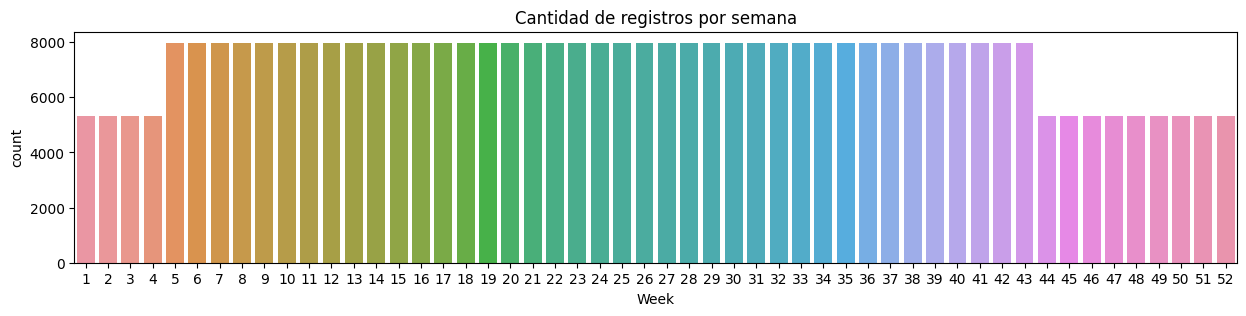

In [ ]:
plt.subplots(figsize=(15,3))
sns.countplot(data=df, x="Week")
plt.title("Cantidad de registros por semana")
plt.show()

**insight**: Cada semana de la 5 hasta la 43 tiene registros estables, sin embargo hay menos registros de la semana 1 a la 4 y 44 hasta la 52, esto se explica ya que 2010 empieza en la semana 5 y 2012 termina en la semana 43.

---

*-Se comprueba la cantidad de de registros por semana y año*


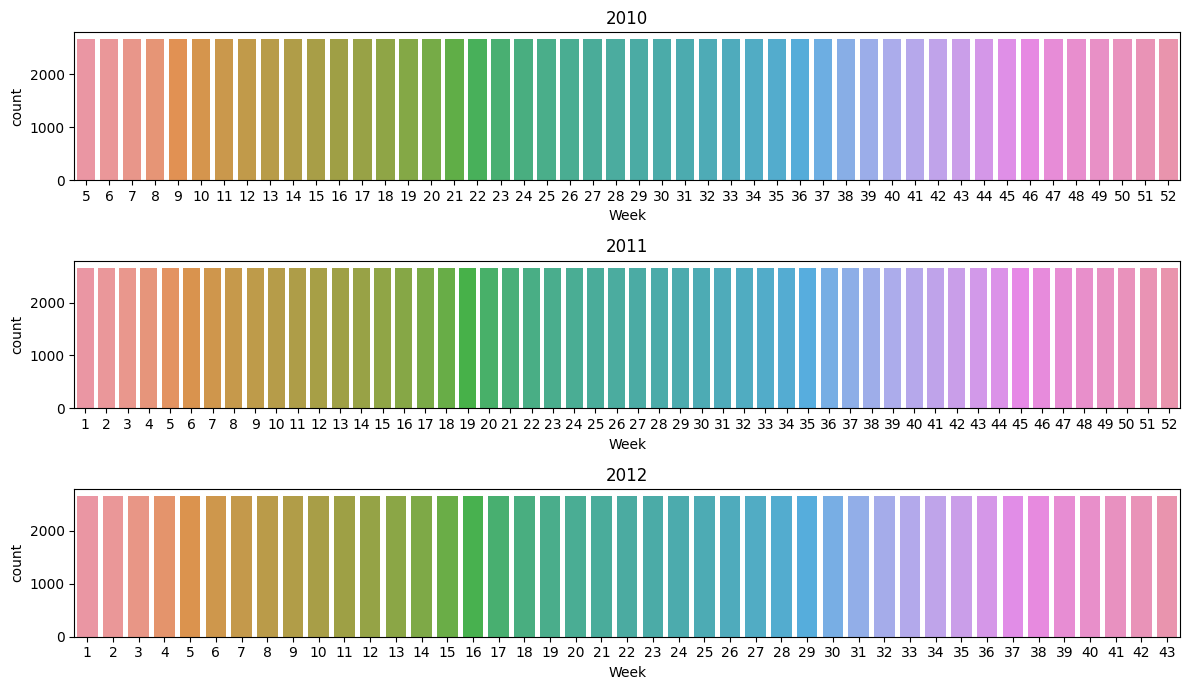

In [ ]:
#Se filtra por año
df_2010=df[df['Year']==2010 ]
df_2011=df[df['Year']==2011 ]
df_2012=df[df['Year']==2012 ]

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,7))
sns.countplot(data=df_2010, x="Week",ax=ax1)
ax1.set_title("2010")
sns.countplot(data=df_2011, x="Week",ax=ax2)
ax2.set_title("2011")
sns.countplot(data=df_2012, x="Week",ax=ax3)
ax3.set_title("2012")
plt.tight_layout()
plt.show()

**insight**: Cada año tiene una cantidad de registros estable.

---












###Se comprueba que no hayan datos nulos o vacios

####Se analiza la cantidad de departamentos faltantes por tienda

In [ ]:
numeracion=list(range(1,100))
faltantes_dept=[]
store=df.Store.unique()
dept_data=[]
count_dept=[]
for i in store:
  count=0
  df_filtro=df[df.Store==i]
  dept=df_filtro.Dept.unique()
  dept.sort()
  lis_dept_faltantes=[]
  count_dept.append([i,len(dept)])
  for j in numeracion:
    if j not in dept:
      lis_dept_faltantes.append(j)
      faltantes_dept.append(j)
      count=count+1
  print(f"Store: {i}, Total:{count} -Dept faltantes: {lis_dept_faltantes}")

  dept_data.append([i,count])

Store: 1, Total:22 -Dept faltantes: [15, 39, 43, 50, 53, 57, 61, 62, 63, 64, 65, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]
Store: 2, Total:21 -Dept faltantes: [15, 43, 50, 53, 57, 61, 62, 63, 64, 65, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]
Store: 3, Total:27 -Dept faltantes: [15, 37, 39, 43, 48, 50, 53, 57, 58, 61, 62, 63, 64, 65, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89, 93, 99]
Store: 4, Total:21 -Dept faltantes: [15, 43, 50, 53, 57, 61, 62, 63, 64, 65, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]
Store: 5, Total:27 -Dept faltantes: [15, 37, 39, 43, 48, 50, 53, 57, 61, 62, 63, 64, 65, 66, 68, 69, 70, 73, 75, 76, 83, 84, 86, 88, 89, 93, 99]
Store: 6, Total:22 -Dept faltantes: [15, 39, 43, 50, 53, 57, 61, 62, 63, 64, 65, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]
Store: 7, Total:23 -Dept faltantes: [15, 37, 39, 43, 50, 53, 57, 61, 62, 63, 64, 65, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]
Store: 8, Total:23 -Dept faltantes: [15, 39, 43, 48, 50, 53, 57, 61, 62, 63, 64, 65, 66, 

*Se analiza la cantidad de departamentos faltantes*

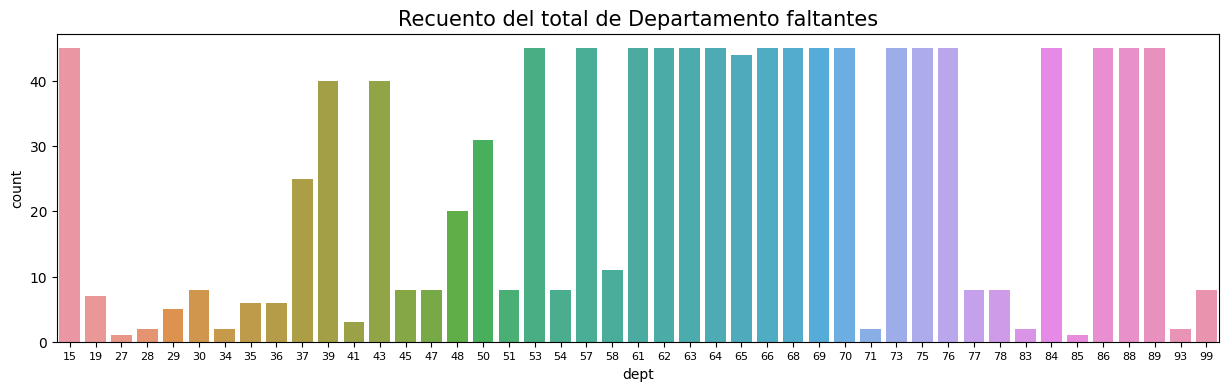

In [ ]:
faltantes_dept_df=pd.DataFrame(faltantes_dept,columns=['dept'])
faltantes_dept_df['dept'].unique().sort()
faltantes_dept_count=[]
for i in faltantes_dept_df['dept'].unique():
  faltantes_dept_count.append([i,faltantes_dept.count(i)])

faltantes_dept_count_df=pd.DataFrame(faltantes_dept_count,columns=['dept','count'])
f,ax1 =plt.subplots(figsize=(15,4))
x=sns.barplot(x=faltantes_dept_count_df["dept"],y=faltantes_dept_count_df["count"])
plt.xticks( fontsize=8)
plt.title("Recuento del total de Departamento faltantes", fontsize=15)
plt.show()

*Se analiza la cantidad de departamentos faltantes por tienda*

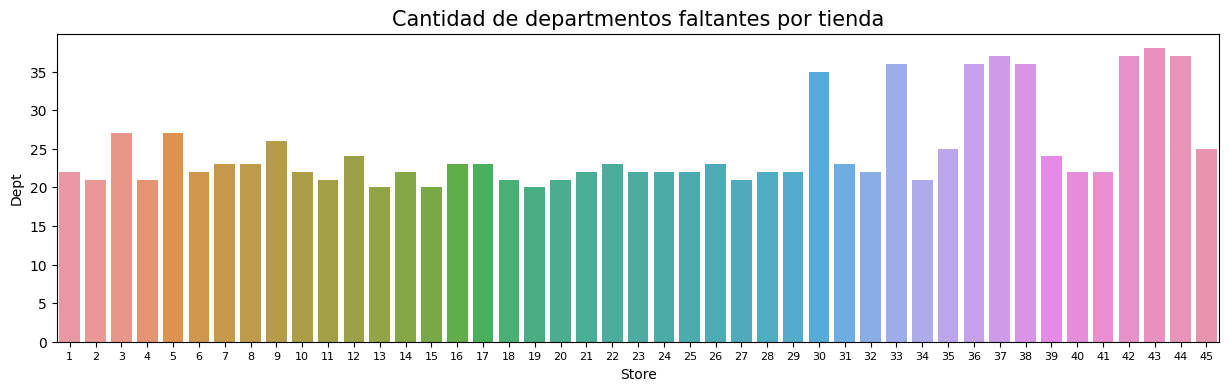

In [ ]:
dept_data_df=pd.DataFrame(dept_data,columns=["Store","Dept"])
f,ax1 =plt.subplots(figsize=(15,4))
sns.barplot(x=dept_data_df["Store"],y=dept_data_df["Dept"])
plt.xticks( fontsize=8)
plt.title("Cantidad de departmentos faltantes por tienda", fontsize=15)
plt.show()

*Conteo de departamentos en total por cada tienda*

In [ ]:
for i in count_dept:
  print(f"Store: {i[0]}, cantidad de departamentos en total: {i[1]}")

Store: 1, cantidad de departamentos en total: 77
Store: 2, cantidad de departamentos en total: 78
Store: 3, cantidad de departamentos en total: 72
Store: 4, cantidad de departamentos en total: 78
Store: 5, cantidad de departamentos en total: 72
Store: 6, cantidad de departamentos en total: 77
Store: 7, cantidad de departamentos en total: 76
Store: 8, cantidad de departamentos en total: 76
Store: 9, cantidad de departamentos en total: 73
Store: 10, cantidad de departamentos en total: 77
Store: 11, cantidad de departamentos en total: 78
Store: 12, cantidad de departamentos en total: 75
Store: 13, cantidad de departamentos en total: 79
Store: 14, cantidad de departamentos en total: 77
Store: 15, cantidad de departamentos en total: 79
Store: 16, cantidad de departamentos en total: 76
Store: 17, cantidad de departamentos en total: 76
Store: 18, cantidad de departamentos en total: 78
Store: 19, cantidad de departamentos en total: 79
Store: 20, cantidad de departamentos en total: 78
Store: 21

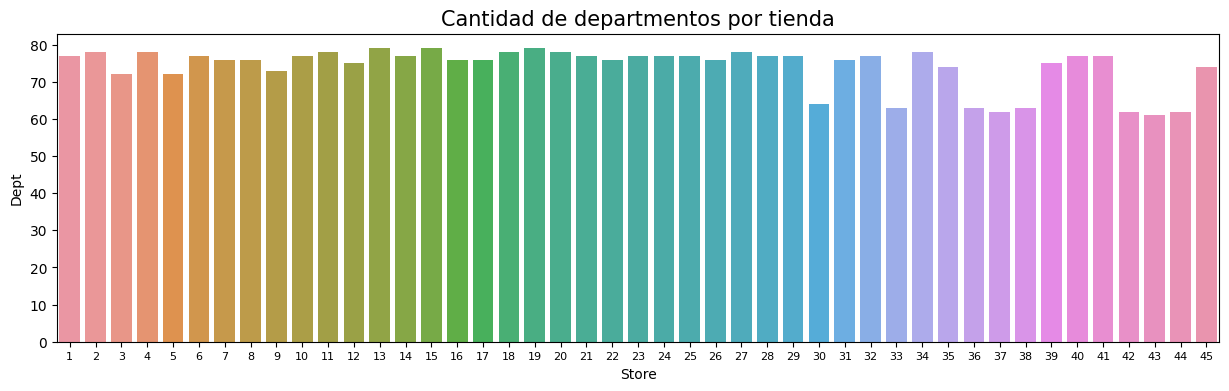

In [ ]:
count_dept_df=pd.DataFrame(count_dept,columns=["Store","Dept"])
f,ax1 =plt.subplots(figsize=(15,4))
sns.barplot(x=count_dept_df["Store"],y=count_dept_df["Dept"])
plt.xticks( fontsize=8)
plt.title("Cantidad de departmentos por tienda", fontsize=15)

plt.show()

**insight**: Se observa el detalle de los departamentos que faltan por tienda

*   El departamento N° 15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89 no existe para ninguna tienda.
*   No todos los Store tiene todos los departamentos


---

###Se comprueba que cada Store y Departamento tengan la cantidad de registros totales de tiempo

*-Se comprueba que no falten registros de fecha, cabe recordar que la fecha empieza el 2010/02/05 y termina el 2012/10/26  con saltos de tiempo de 1 semana a otra, siendo cada dia viernes de cada mes*

In [ ]:
from datetime import date, timedelta
#Comienzo y fin de el periodo
start_dt = date(2010, 2, 5)
end_dt = date(2012,10,26	)

#Salto de tiempo, que sera de una semana
delta = timedelta(days=7)

dates = []

while start_dt <= end_dt:
    #Se agrega las fechas a dates
    dates.append(start_dt.isoformat())
    start_dt += delta
#Se obtiene el largo de la lista generada
len(dates)

143

**insight**: Hay 143 semanas en el periodo de tiempo del inicio de la base de datos hasta el final



---

*Se filtra por datos faltantes*

In [ ]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,2010-02-05,24924.50,False,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5,5
1,1,2,2010-02-05,50605.27,False,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5,5
2,1,3,2010-02-05,13740.12,False,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5,5
3,1,4,2010-02-05,39954.04,False,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5,5
4,1,5,2010-02-05,32229.38,False,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421563,45,91,2012-10-26,16330.84,False,-9.490741,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26,43
421564,45,92,2012-10-26,54608.75,False,-9.490741,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26,43
421565,45,93,2012-10-26,2487.80,False,-9.490741,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26,43
421567,45,95,2012-10-26,56017.47,False,-9.490741,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,2012,10,26,43


In [ ]:
series_time=[]
lista_Store=df.Store.unique()
lista_Store.sort()
lista_dept=df.Dept.unique()
lista_dept.sort()

for i in lista_Store:
  for j in lista_dept:
    #lista=[]
    test=df[(df.Store==i) & (df.Dept==j)]
    if(test.empty!=True):
      if(len(test)!=143):
        print(f"La store: {i}, y dept: {j} tiene fechas faltantes, con {len(test)} semanas en total")
        #Se filtra data
        df.drop(df[(df.Store==i) & (df.Dept==j)].index,inplace=True)


---
**insight**: Se comprueba que en cada Store y Depatarmento faltan semanas por contabilizar, en algunos casos son extremos de 1 a 10 registros de fecha.

###Analisis de las variable de Markdown 1 al 5

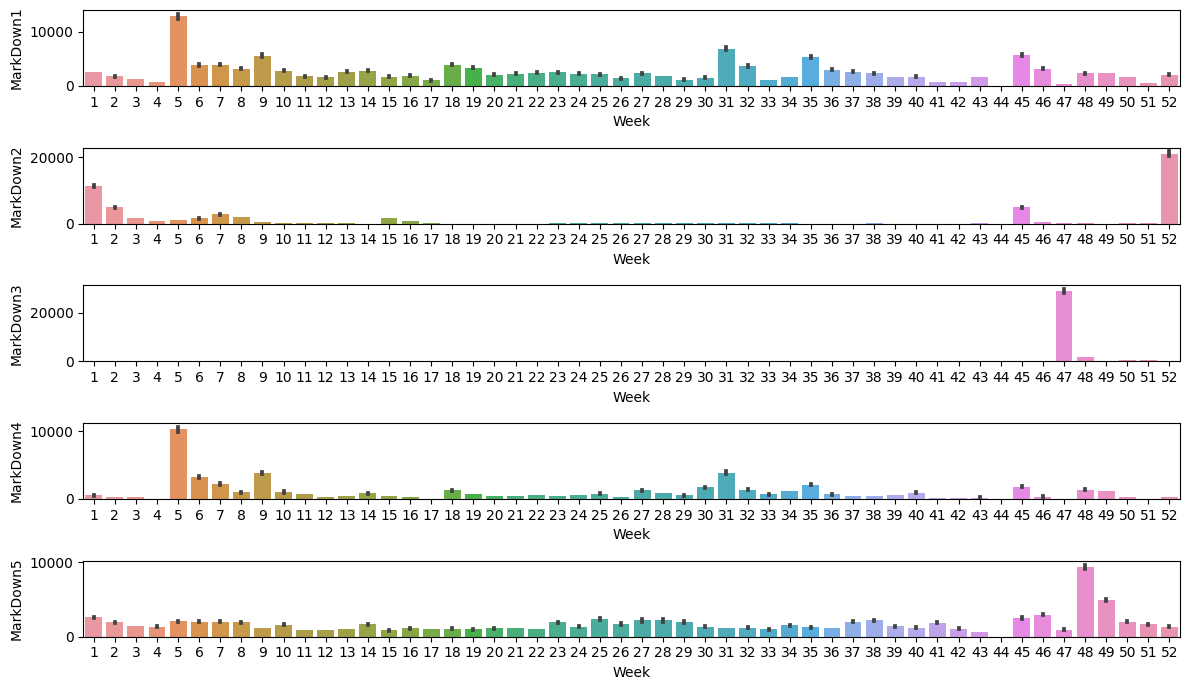

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(12,7))
sns.barplot(x=df["Week"],y=df["MarkDown1"],ax=ax1)
sns.barplot(x=df["Week"],y=df["MarkDown2"],ax=ax2)
sns.barplot(x=df["Week"],y=df["MarkDown3"],ax=ax3)
sns.barplot(x=df["Week"],y=df["MarkDown4"],ax=ax4)
sns.barplot(x=df["Week"],y=df["MarkDown5"],ax=ax5)
plt.tight_layout()
plt.show()

###Análisis de Normalidad


*Se analiza mediante graficos de dispersion el comportamiento de las variables*

In [ ]:
def grafico_distribucion(variable):
  plt.subplots(figsize=(4,3))
  sns.histplot(x=df[variable],kde=True,color="blue",bins=30)
  plt.tight_layout()
  plt.show()

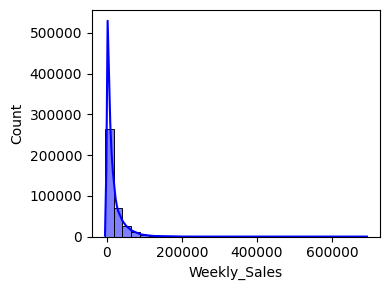

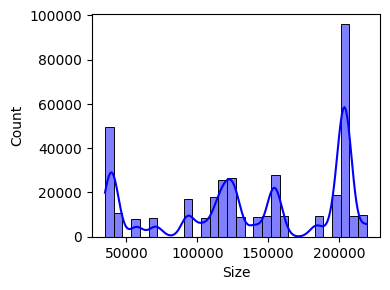

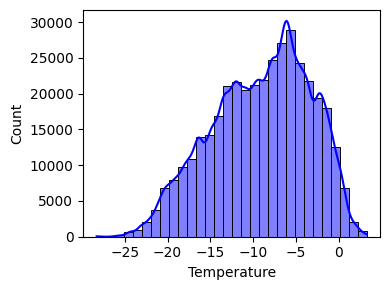

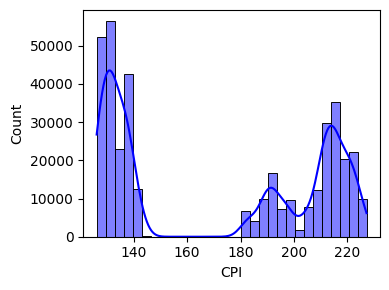

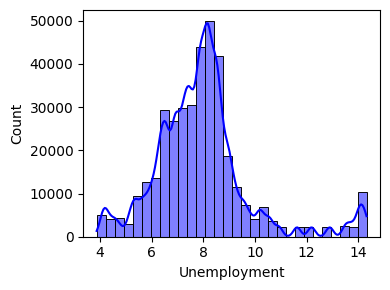

In [ ]:
grafico_distribucion("Weekly_Sales")
grafico_distribucion("Size")
grafico_distribucion("Temperature")
grafico_distribucion("CPI")
grafico_distribucion("Unemployment")


In [ ]:
df_type=df.copy()
df_type.loc[df_type["Type"] == "A", "Type"] = 1
df_type.loc[df_type["Type"] == "B", "Type"] = 2
df_type.loc[df_type["Type"] == "C", "Type"] = 3
df_type['Type'] = df_type['Type'].astype(str).astype(int)

*Mediante el test de shapiro se comprueba normalidad de cada variable del dataframe*

**Shapiro-Wilk test**

Comprueba si una muestra de datos tiene una distribución gaussiana.

Supuestos:

Las observaciones en cada muestra son independientes e idénticamente distribuidas (iid).

Interpretación:

* H0: la muestra tiene una distribución gaussiana.
* H1: la muestra no tiene distribución gaussiana.

In [ ]:
def shapiro(data):
  stat, p = stats.shapiro(df_type[data])
  print("Analisis de: "+data)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('Probably Gaussian')
    print("")
  else:
    print('Probably not Gaussian')
    print("")

In [ ]:
shapiro('Size')
shapiro('Temperature')
shapiro('CPI')
shapiro('Fuel_Price')
shapiro('MarkDown1')
shapiro('MarkDown2')
shapiro('MarkDown3')
shapiro('MarkDown4')
shapiro('MarkDown5')
shapiro('Weekly_Sales')
shapiro('Type')
shapiro('Dept')
shapiro('Store')


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Analisis de: Size
stat=0.885, p=0.000
Probably not Gaussian

Analisis de: Temperature
stat=0.981, p=0.000
Probably not Gaussian

Analisis de: CPI
stat=0.792, p=0.000
Probably not Gaussian

Analisis de: Fuel_Price
stat=0.952, p=0.000
Probably not Gaussian

Analisis de: MarkDown1
stat=0.482, p=0.000
Probably not Gaussian

Analisis de: MarkDown2
stat=0.164, p=0.000
Probably not Gaussian

Analisis de: MarkDown3
stat=0.057, p=0.000
Probably not Gaussian

Analisis de: MarkDown4
stat=0.288, p=0.000
Probably not Gaussian

Analisis de: MarkDown5
stat=0.397, p=0.000
Probably not Gaussian

Analisis de: Weekly_Sales
stat=0.676, p=0.000
Probably not Gaussian

Analisis de: Type
stat=0.744, p=0.000
Probably not Gaussian

Analisis de: Dept
stat=0.920, p=0.000
Probably not Gaussian

Analisis de: Store
stat=0.957, p=0.000
Probably not Gaussian



**insight**:Mediante el test de shapiro se comprueba que ninguna variable sigue una distribucion normal.

---

##Analasis Bivariado

### Analisis de Ventas en el tiempo


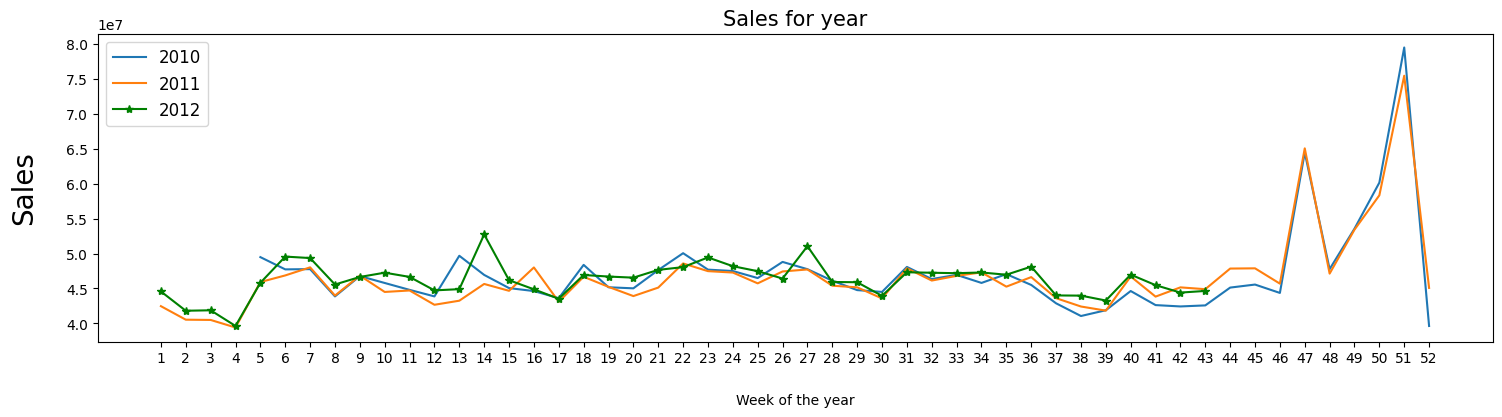

In [ ]:
#Filtro por año, agrupando por Week, sumando las ventas
weekly_sales_2010 = df[df['Year']==2010].groupby('Week')['Weekly_Sales'].sum()
weekly_sales_2011 = df[df['Year']==2011].groupby('Week')['Weekly_Sales'].sum()
weekly_sales_2012 = df[df['Year']==2012].groupby('Week')['Weekly_Sales'].sum()

plt.figure(figsize=(18,4))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Week of the year', fontsize=10, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Sales for year", fontsize=15)
plt.legend(['2010', '2011', '2012'], fontsize=12)

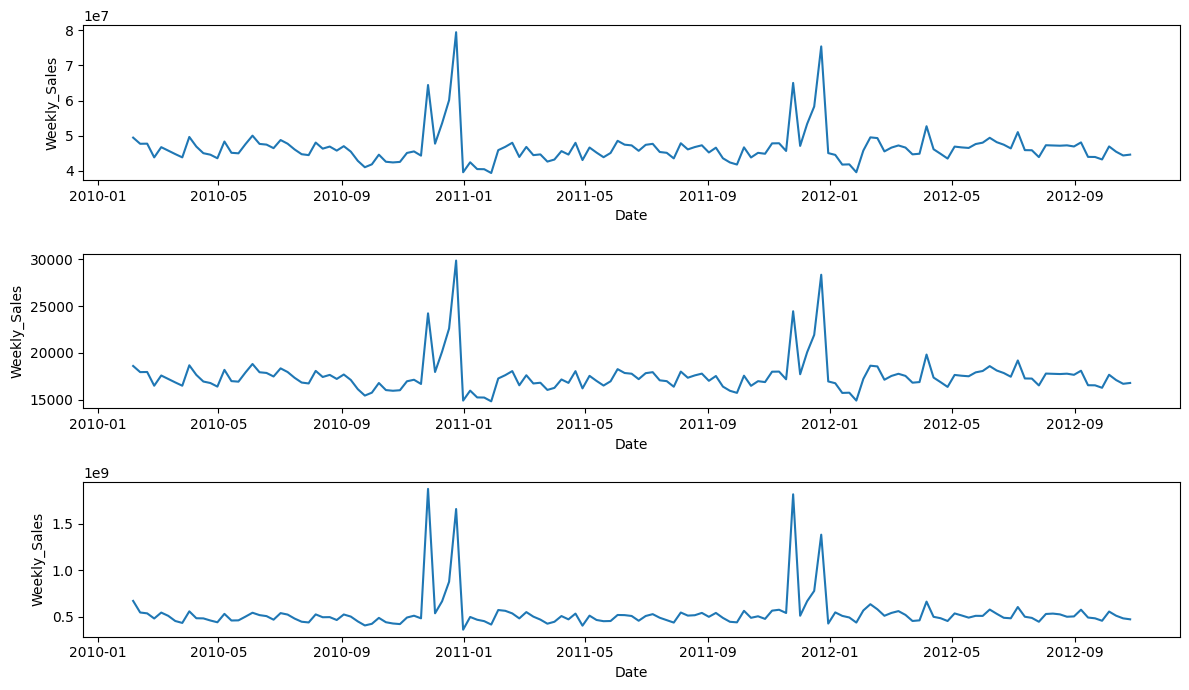

In [ ]:
f=df.groupby('Date')['Weekly_Sales'].sum().reset_index()
d=df.groupby('Date')['Weekly_Sales'].mean().reset_index()
c=df.groupby('Date')['Weekly_Sales'].var().reset_index()

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,7))
sns.lineplot(x=f["Date"],y=f["Weekly_Sales"],ax=ax1)
sns.lineplot(x=d["Date"],y=d["Weekly_Sales"],ax=ax2)
sns.lineplot(x=c["Date"],y=c["Weekly_Sales"],ax=ax3)
plt.tight_layout()
plt.show()

**insight**: Se observa una tendencia del alza a fines de cada año, coindicendia con las fiestas festivas. Durante el resto del año se mantiene una cantidad de ventas estables.

---

###Análisis de ventas por Type, Size y Store

*Grafico de ventas por Store*

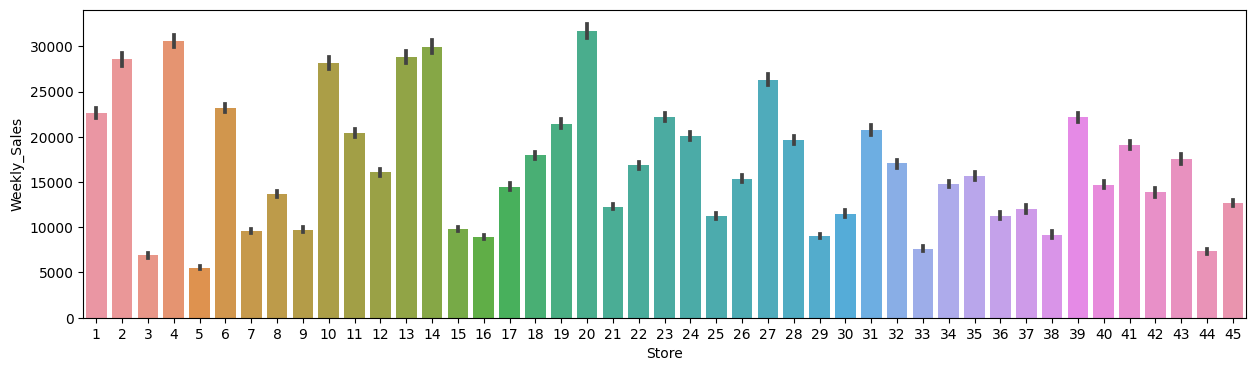

In [ ]:
plt.subplots(figsize=(15,4))
sns.barplot(x=df["Store"],y=df["Weekly_Sales"])
plt.show()

**insight**: Cada tienda tiene ventas de forma irregular.

---

*Ventas por tamaño de tienda*

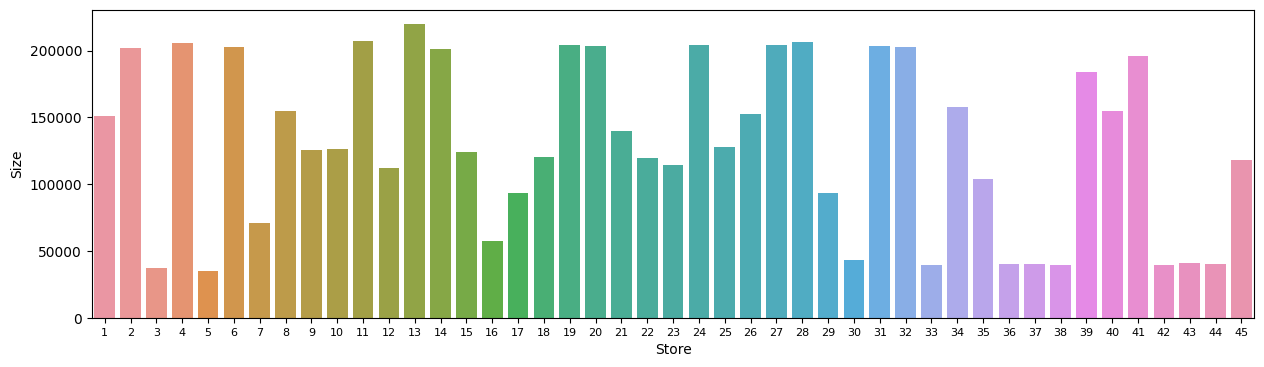

In [ ]:
sizes= df.groupby(["Size","Store"])['Weekly_Sales'].sum().round(0).reset_index()
f,ax1 =plt.subplots(figsize=(15,4))
sns.barplot(x=sizes["Store"],y=sizes["Size"])
plt.xticks( fontsize=8)
plt.show()

**insight**: El tamaño de la tienda indica una tendencia de mas ventas.

---

*Analisis de ventas en el tiempo*

In [ ]:
def grafico_lineas_store(x,ejex,ejey):
  aux=str(x[0])
  aux_1=str(x[1])
  aux_2=str(x[2])
  for i in x :
      data_1=data[data['Store']==i]
      ax[ejex,ejey].plot(data_1['Date'], data_1['Weekly_Sales'])
      ax[ejex,ejey].set_ylabel('Mean sales')
      ax[ejex,ejey].set_xlabel('Date')
      ax[ejex,ejey].legend([aux,aux_1,aux_2])
      ax[ejex,ejey].set_title('Mean sales record by store '+aux+"--"+aux_2)


<ipython-input-35-c44432166ff5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped=df.groupby(['Store','Date']).mean().round(0).reset_index()


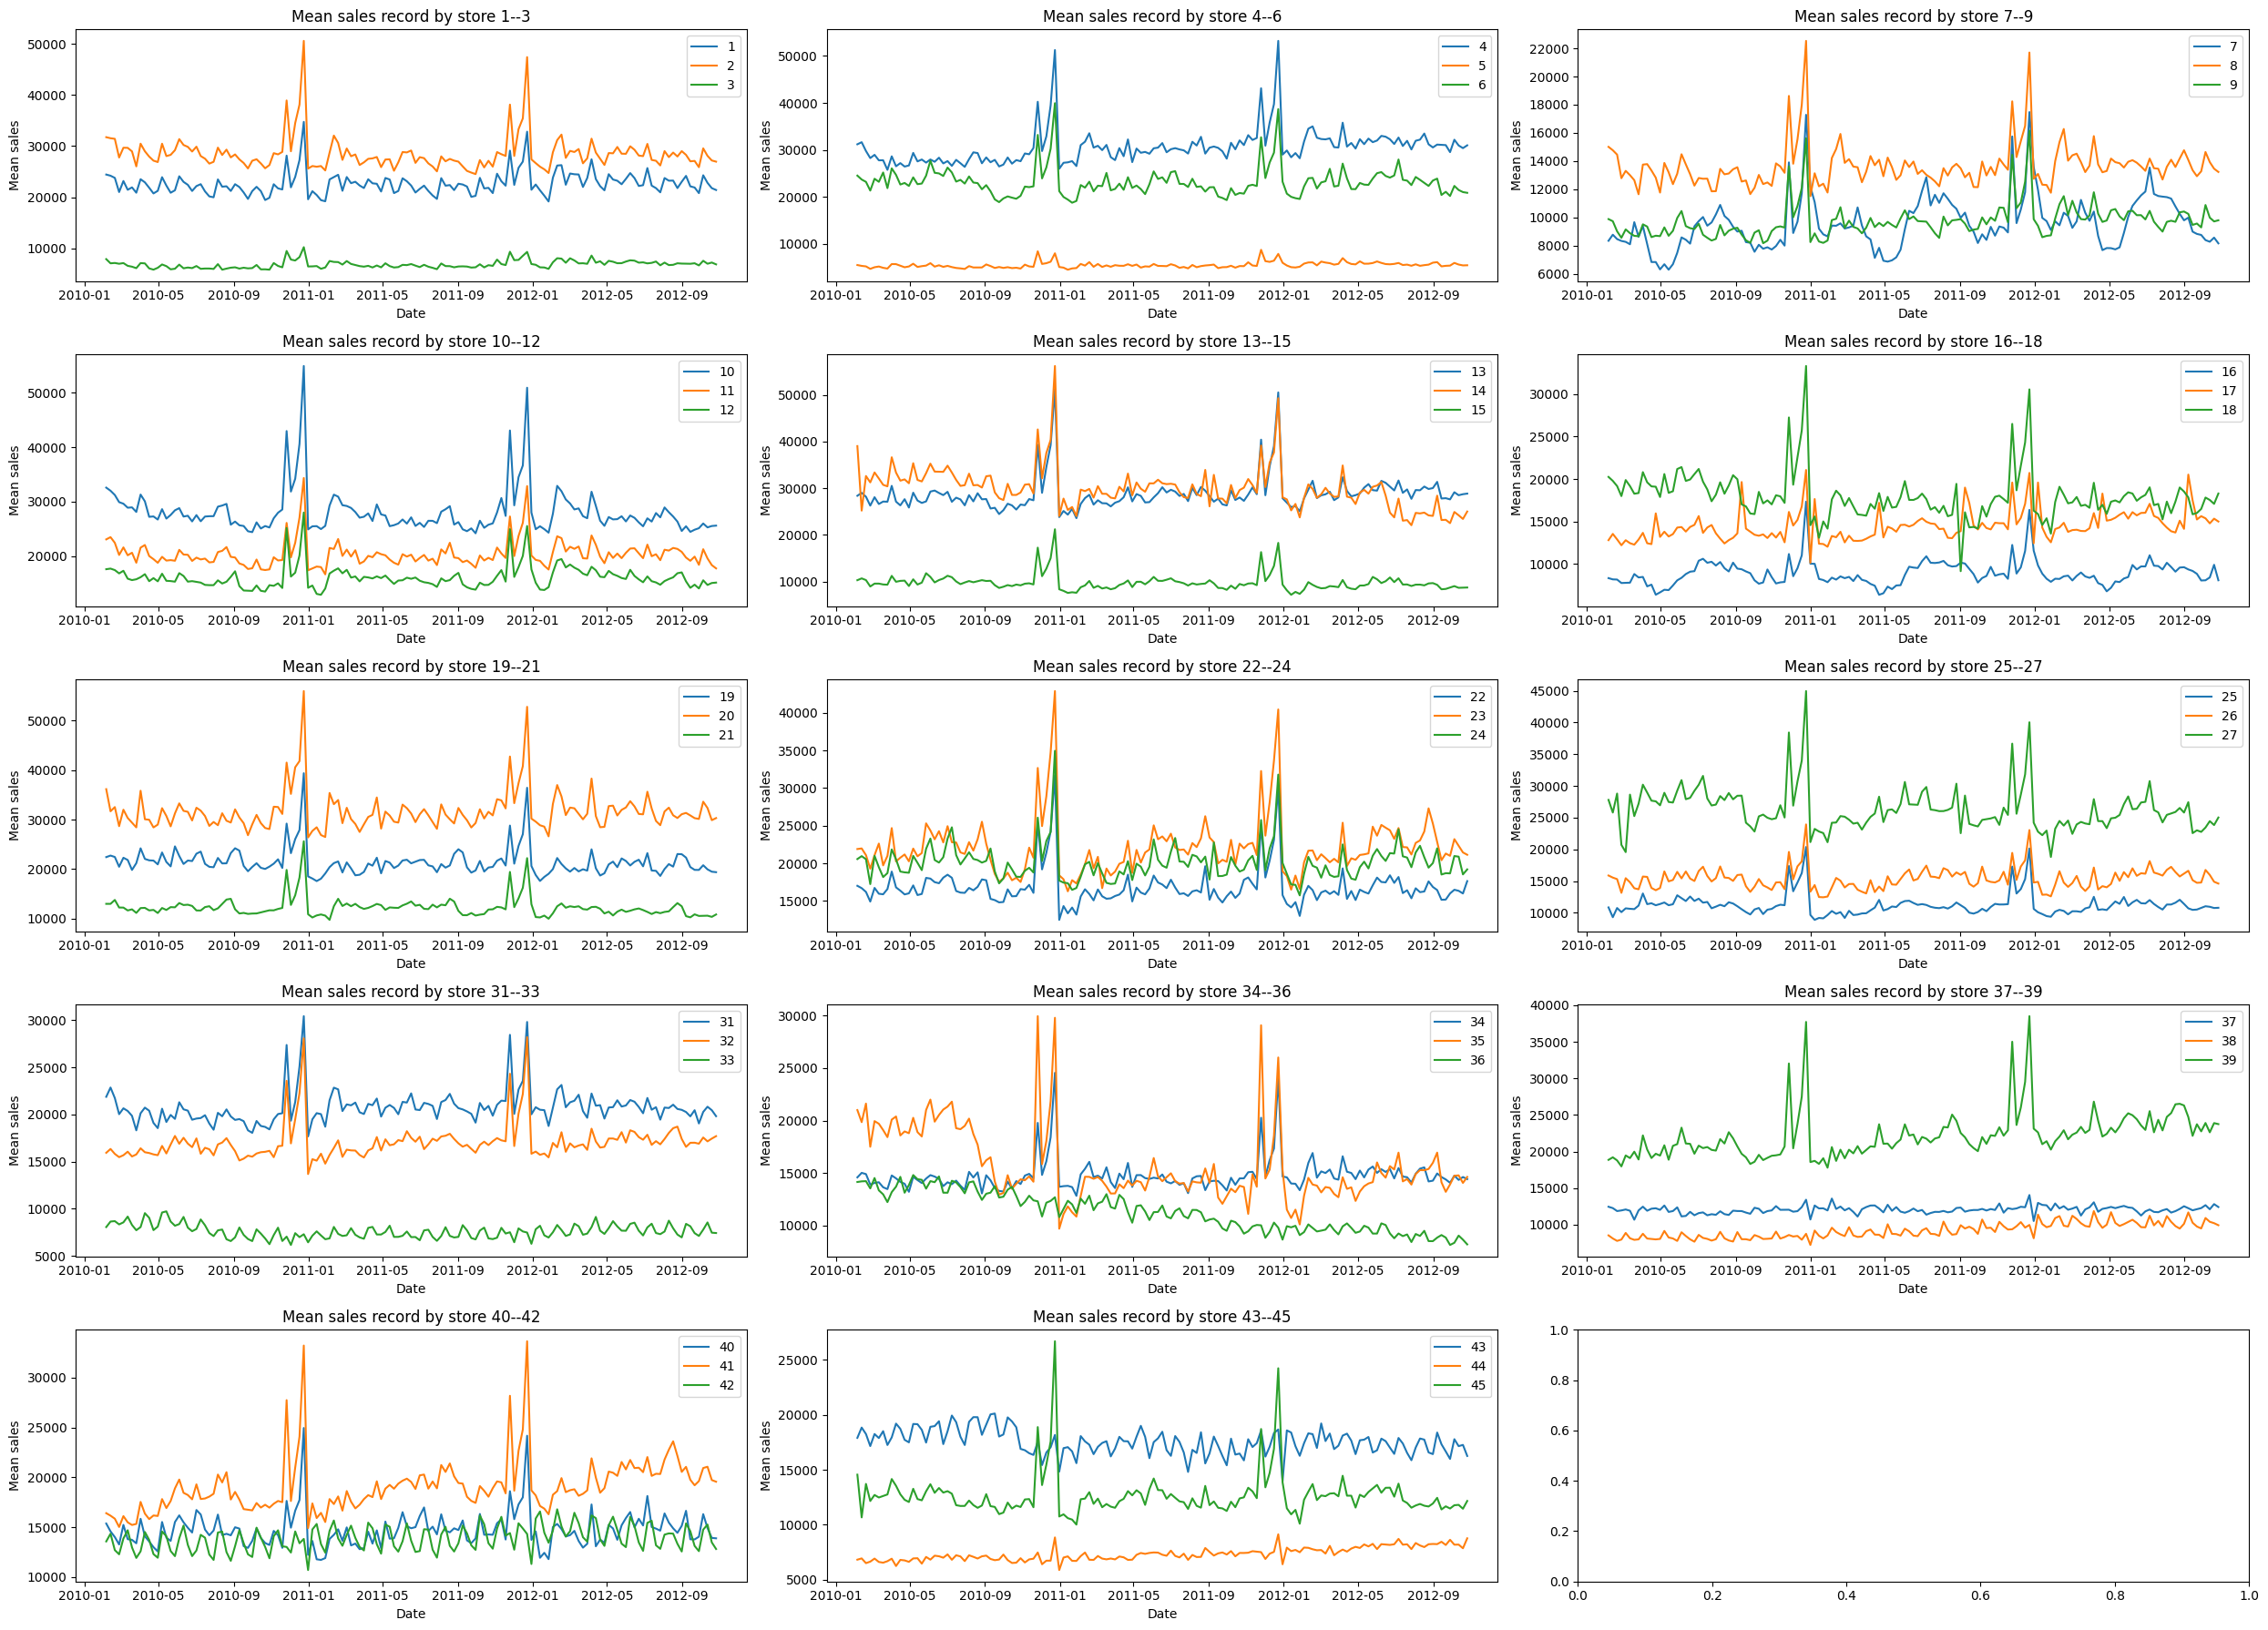

In [ ]:
grouped=df.groupby(['Store','Date']).mean().round(0).reset_index()
grouped.shape
grouped.head()

data=grouped[['Store','Date','Weekly_Sales']]
store=df["Store"].unique()

store_1=store[0:3]
store_2=store[3:6]
store_3=store[6:9]
store_4=store[9:12]
store_5=store[12:15]
store_6=store[15:18]
store_7=store[18:21]
store_8=store[21:24]
store_9=store[24:27]
store_10=store[27:30]
store_11=store[30:33]
store_12=store[33:36]
store_13=store[36:39]
store_14=store[39:42]
store_15=store[42:45]

fig, ax = plt.subplots(5,3,figsize=(25,18))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

grafico_lineas_store(store_1,0,0)
grafico_lineas_store(store_2,0,1)
grafico_lineas_store(store_3,0,2)
grafico_lineas_store(store_4,1,0)
grafico_lineas_store(store_5,1,1)
grafico_lineas_store(store_6,1,2)
grafico_lineas_store(store_7,2,0)
grafico_lineas_store(store_8,2,1)
grafico_lineas_store(store_9,2,2)
grafico_lineas_store(store_11,3,0)
grafico_lineas_store(store_12,3,1)
grafico_lineas_store(store_13,3,2)
grafico_lineas_store(store_14,4,0)
grafico_lineas_store(store_15,4,1)

plt.tight_layout()
plt.show()

**insight**: Se mantiene la tendencia de alza a fin de año.

---

###Análisis de ventas por tipo de Tienda

In [ ]:
def grafico_type(type):

  weekly_sales_2010_type = df[(df['Year']==2010) & (df['Type']==type)].groupby('Week')['Weekly_Sales'].mean()
  weekly_sales_2011_type = df[(df['Year']==2011) & (df['Type']==type)].groupby('Week')['Weekly_Sales'].mean()
  weekly_sales_2012_type = df[(df['Year']==2012) & (df['Type']==type)].groupby('Week')['Weekly_Sales'].mean()

  plt.figure(figsize=(20,3))
  plt.plot(weekly_sales_2010_type.index, weekly_sales_2010_type.values)
  plt.plot(weekly_sales_2011_type.index, weekly_sales_2011_type.values)
  plt.plot(weekly_sales_2012_type.index, weekly_sales_2012_type.values, '*-g')

  plt.xticks(np.arange(1, 53, step=1), fontsize=10)
  plt.yticks( fontsize=10)
  plt.xlabel('Week of the year', fontsize=10, labelpad=8)
  plt.ylabel('Sales', fontsize=15, labelpad=10)

  plt.title("Sales by type "+type, fontsize=15)
  plt.legend(['2010', '2011', '2012'], fontsize=10)

  plt.tight_layout()
  plt.show()

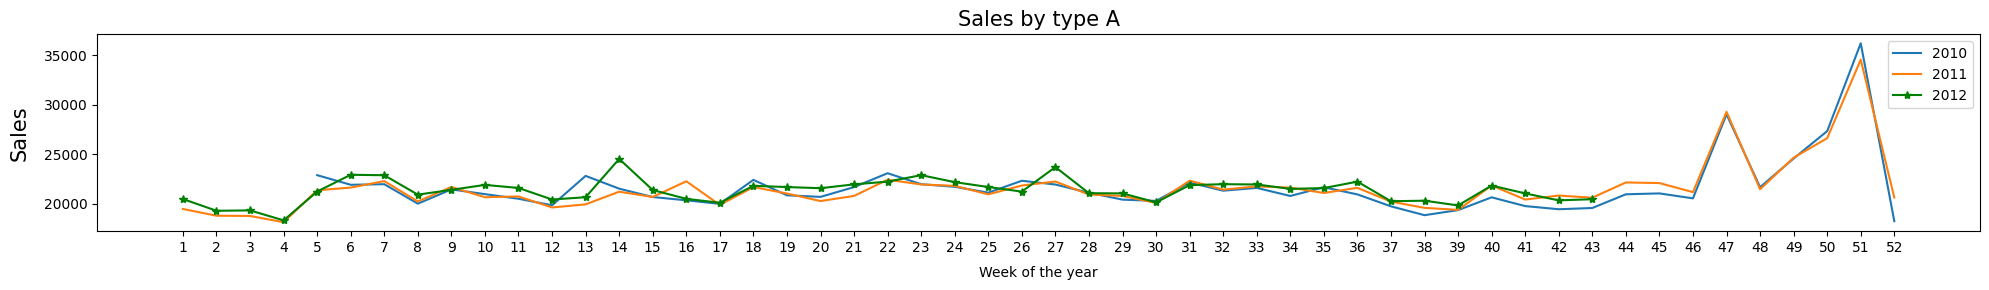

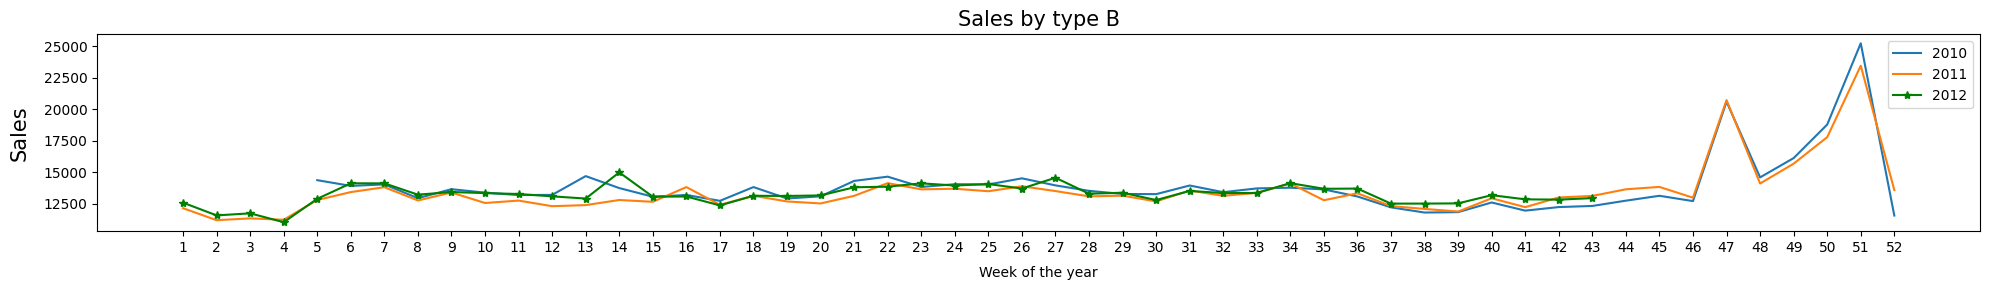

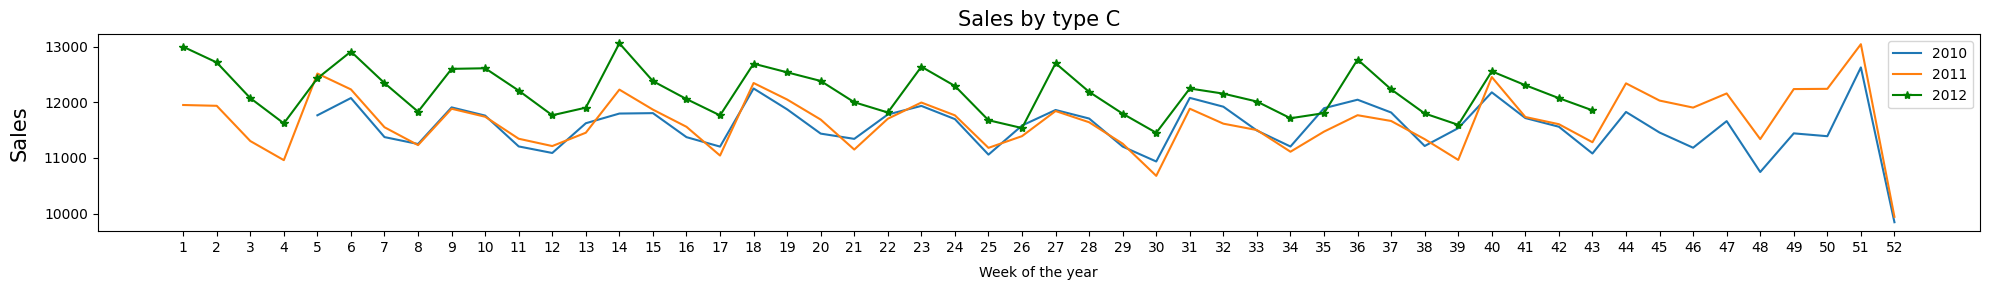

In [ ]:
grafico_type("A")
grafico_type("B")
grafico_type("C")

Text(0.5, 1.0, 'Sales for Type')

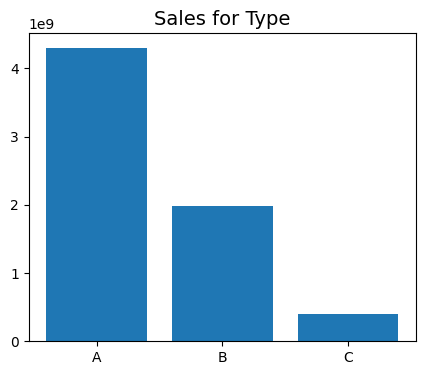

In [ ]:
weekly_sales_type = df.groupby('Type')['Weekly_Sales'].sum()
f, (ax1) = plt.subplots( figsize=(5, 4))
ax1.bar(weekly_sales_type.index,weekly_sales_type.values)
ax1.set_title('Sales for Type', fontsize=14)

**insight**: Mas ventas por tipo de tienda A

---

*Ventas por tipo de tienda*

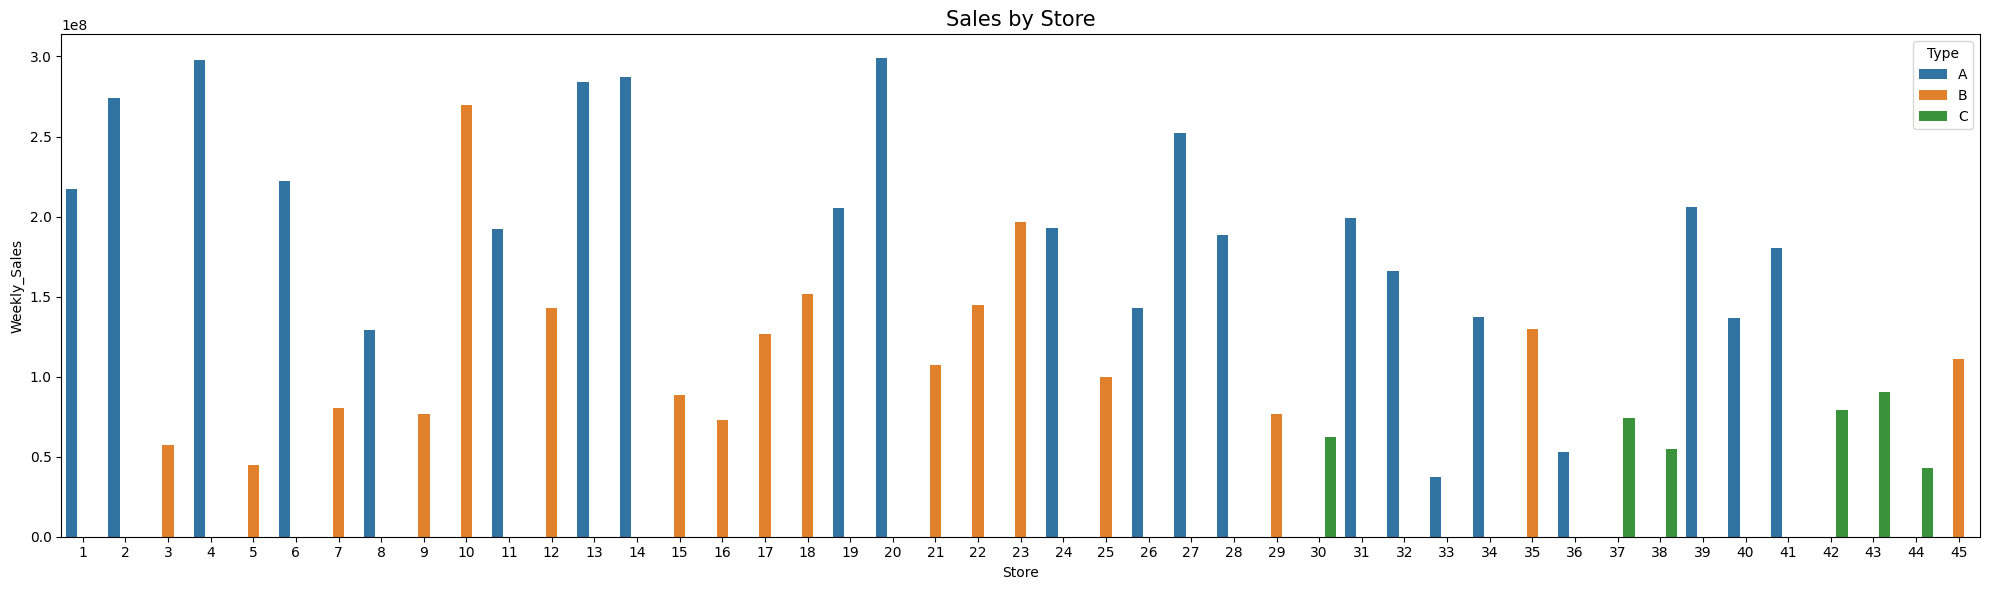

In [ ]:
weekly_sales_type = df.groupby(["Store","Type"])['Weekly_Sales'].sum().reset_index()
plt.subplots(figsize=(20,6))
sns.barplot(data=weekly_sales_type, x="Store", y="Weekly_Sales",hue="Type")
plt.title("Sales by Store", fontsize=15)
plt.tight_layout()
plt.show()

**insight**: Las tiendas de tipo A tienden a tener  mas ventas respecto a las demas.

Considerando que la cantidad de tiendas:

*   Tipo A son 22
*   Tipo B son 17
*   Tipo C son 6



---

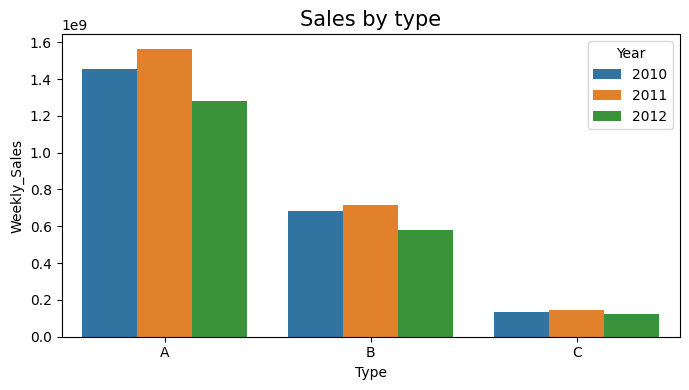

In [ ]:
weekly_sales_type = df.groupby(['Type','Year'])['Weekly_Sales'].sum().reset_index()
plt.subplots(figsize=(7,4))
sns.barplot(data=weekly_sales_type, x="Type", y="Weekly_Sales",hue="Year")
plt.title("Sales by type", fontsize=15)
plt.tight_layout()
plt.show()

**insight**: El año 2012 tiene menos ventas ya que este año no se registra los ultimos meses donde hay mayor peak de ventas.

---

###Análisis de ventas por departamento

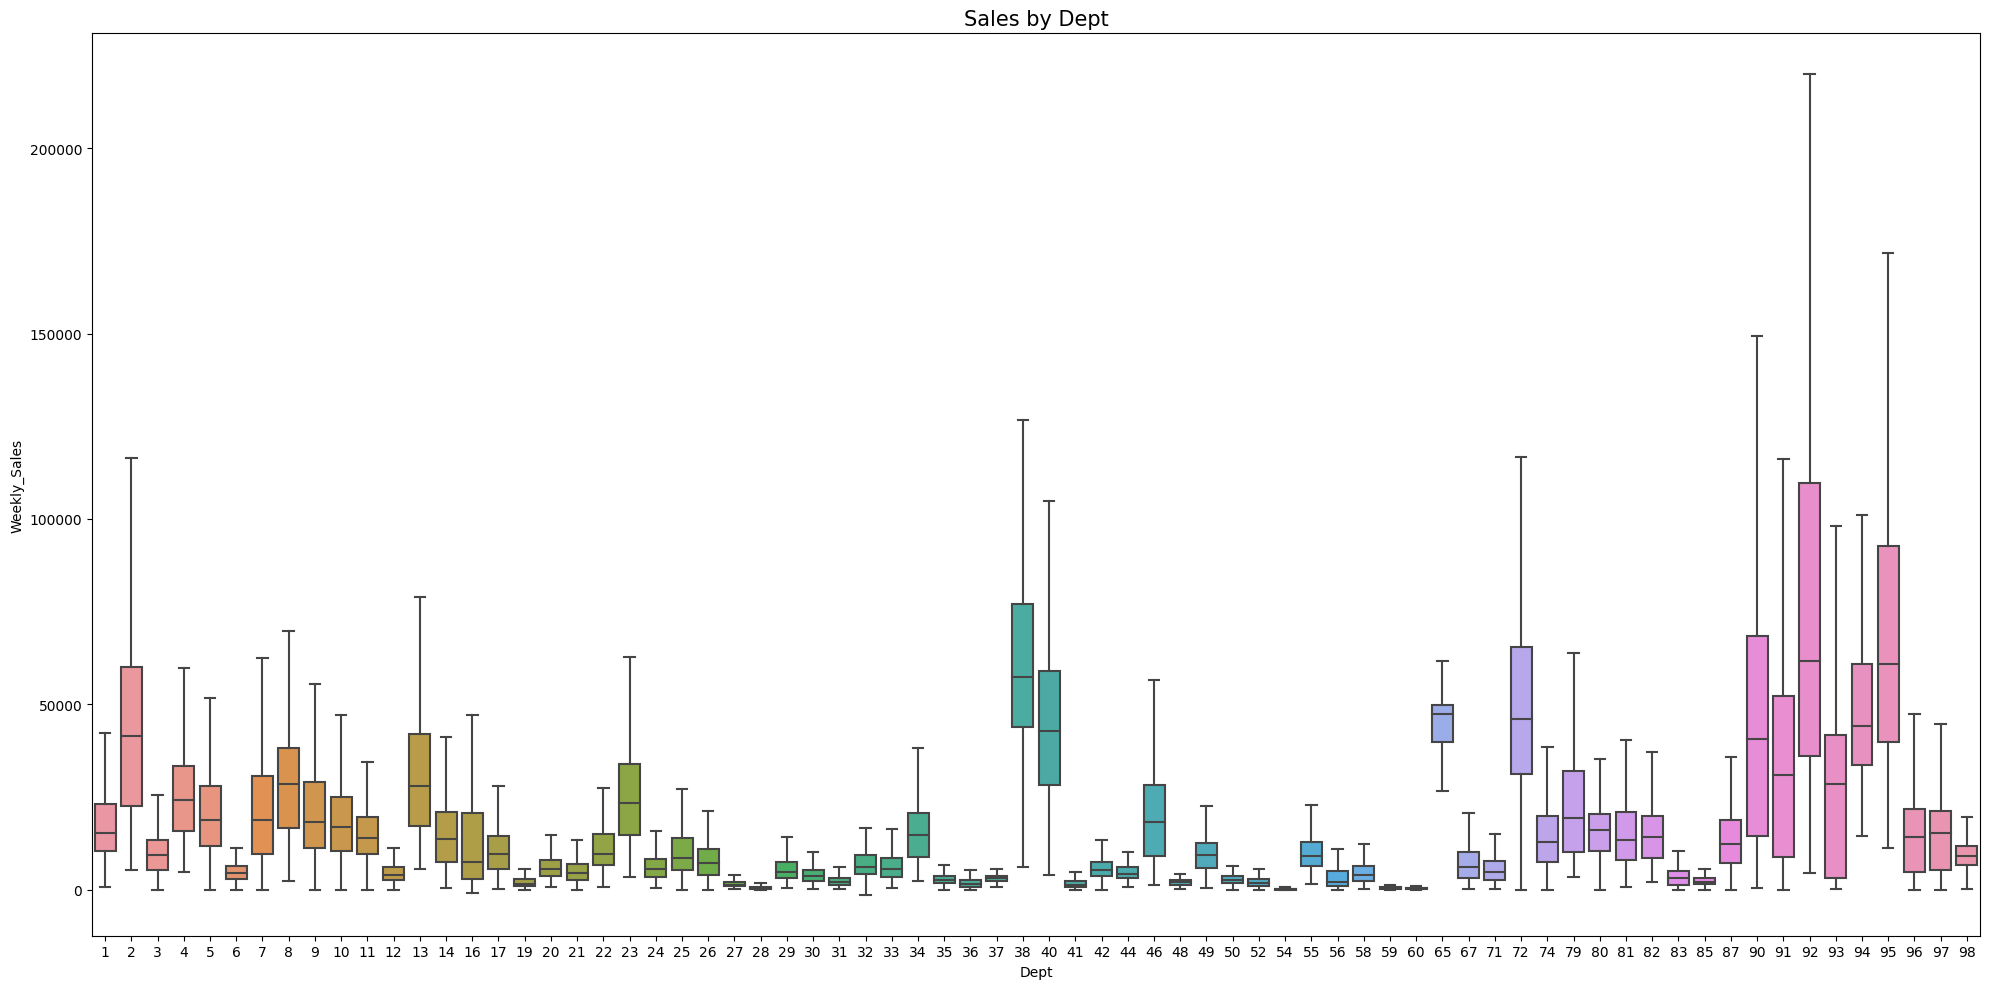

In [ ]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='Dept', y='Weekly_Sales', data=df, showfliers=False)
plt.title("Sales by Dept", fontsize=15)
plt.tight_layout()
plt.show()

**insight**: Cada departamento en la suma de ventas, tiene diferentes indicadores.

---

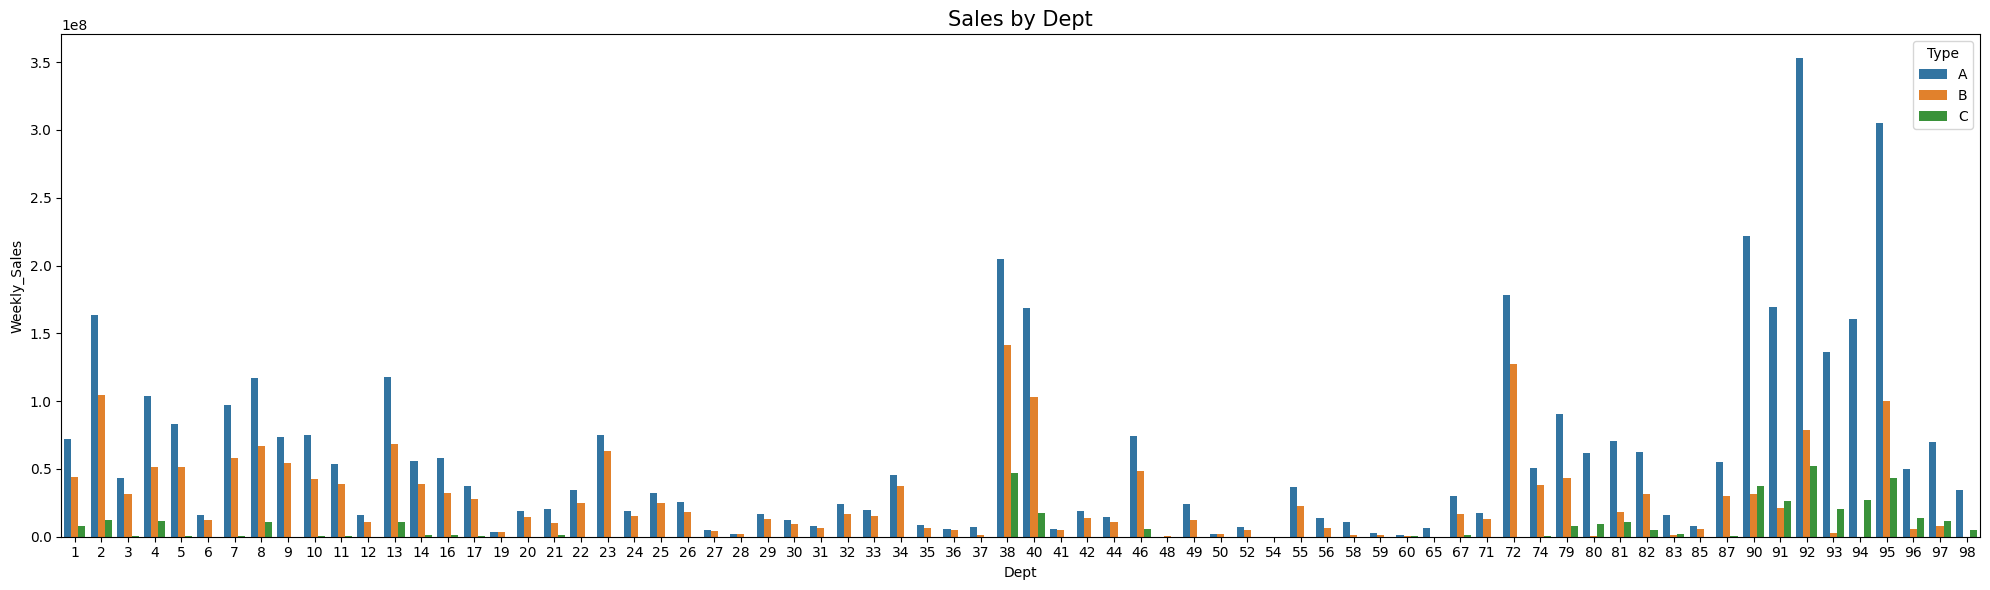

In [ ]:
weekly_sales_dept = df.groupby(["Dept","Type"])['Weekly_Sales'].sum().round(0).reset_index()
plt.subplots(figsize=(20,6))
sns.barplot(data=weekly_sales_dept, x="Dept", y="Weekly_Sales",hue="Type")
plt.title("Sales by Dept", fontsize=15)
plt.tight_layout()
plt.show()

###Análisis de otras características

In [ ]:
def graphic_line_scatter(eje_x):
  f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 3))

  sns.lineplot(x="Date", y=eje_x,data=df,ax=ax1)
  ax1.set_title("Graphic Line "+eje_x, fontsize=14)

  sns.scatterplot(x=eje_x, y="Weekly_Sales",data=df,ax=ax2)
  plt.tight_layout()
  plt.show()

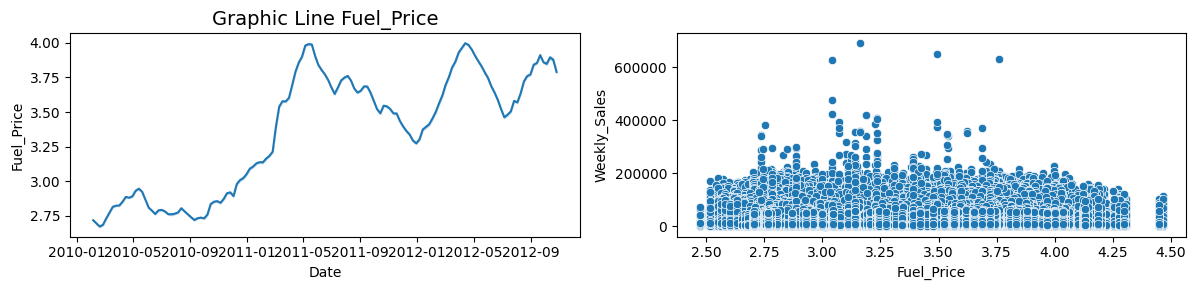

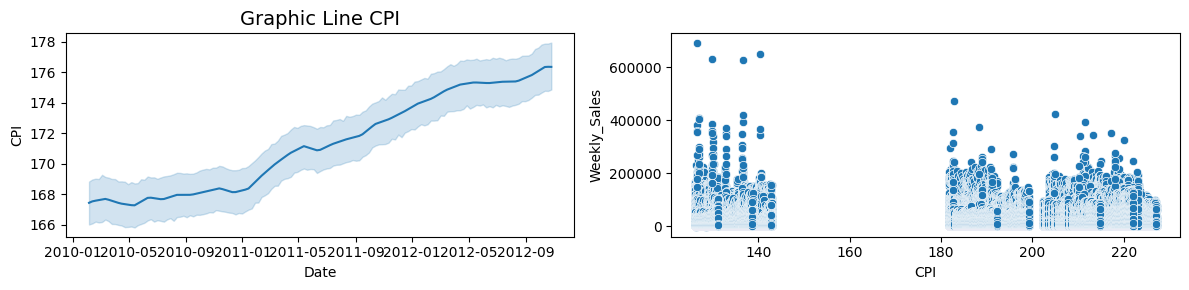

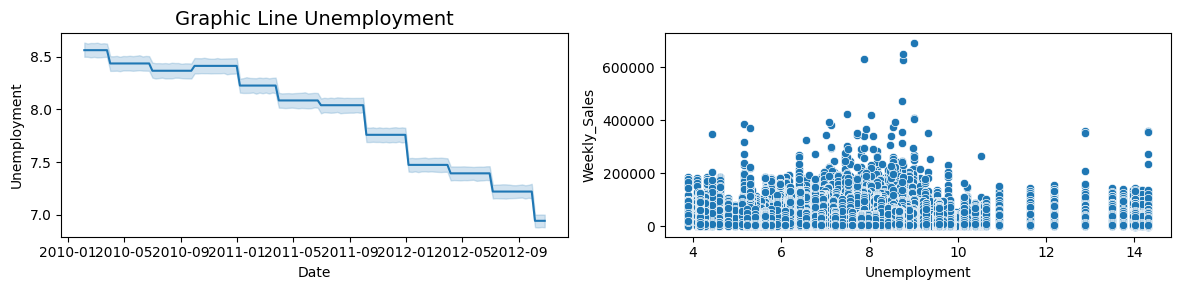

In [ ]:
graphic_line_scatter("Fuel_Price")
graphic_line_scatter("CPI")
graphic_line_scatter("Unemployment")

**insight**: No es concluyente la relacion de estas variables con las ventas.

---

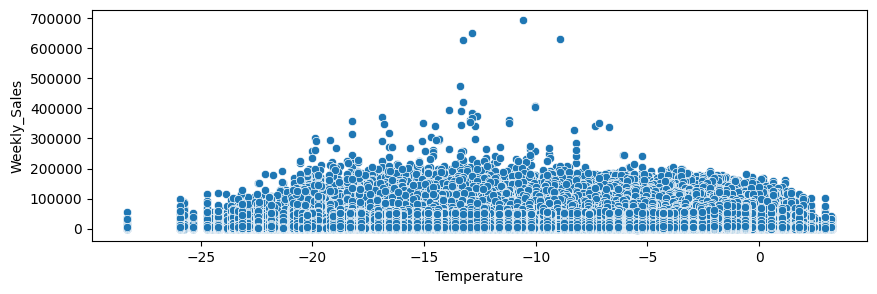

In [ ]:
f,ax1 =plt.subplots(figsize=(10,3))
sns.scatterplot(x=df["Temperature"],y=df["Weekly_Sales"])
plt.show()

### Analisis Size

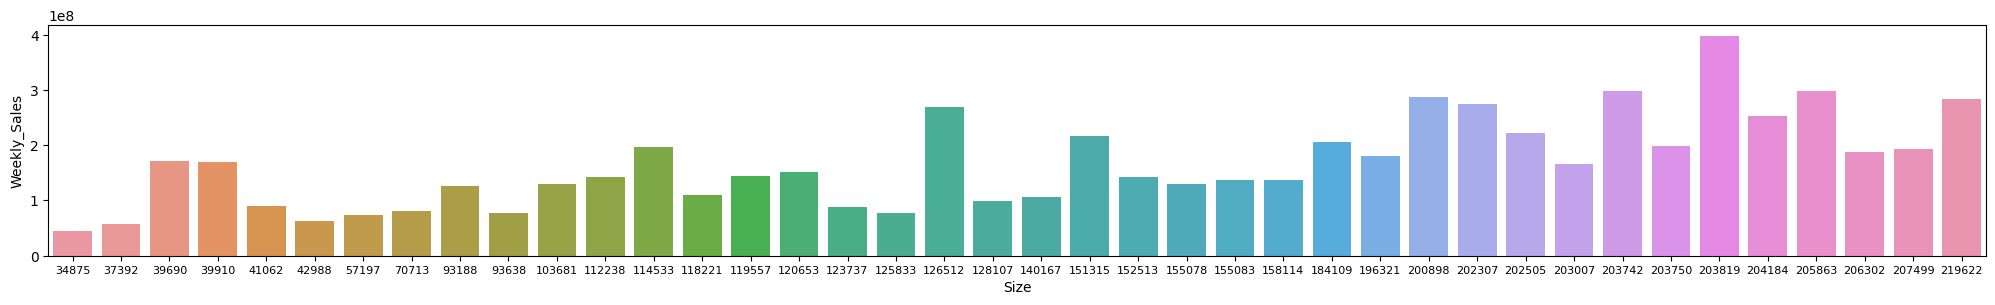

In [ ]:
sizes= df.groupby("Size")['Weekly_Sales'].sum().round(0).reset_index()
f,ax1 =plt.subplots(figsize=(25,3))
sns.barplot(x=sizes["Size"],y=sizes["Weekly_Sales"])
plt.xticks( fontsize=8)
plt.show()

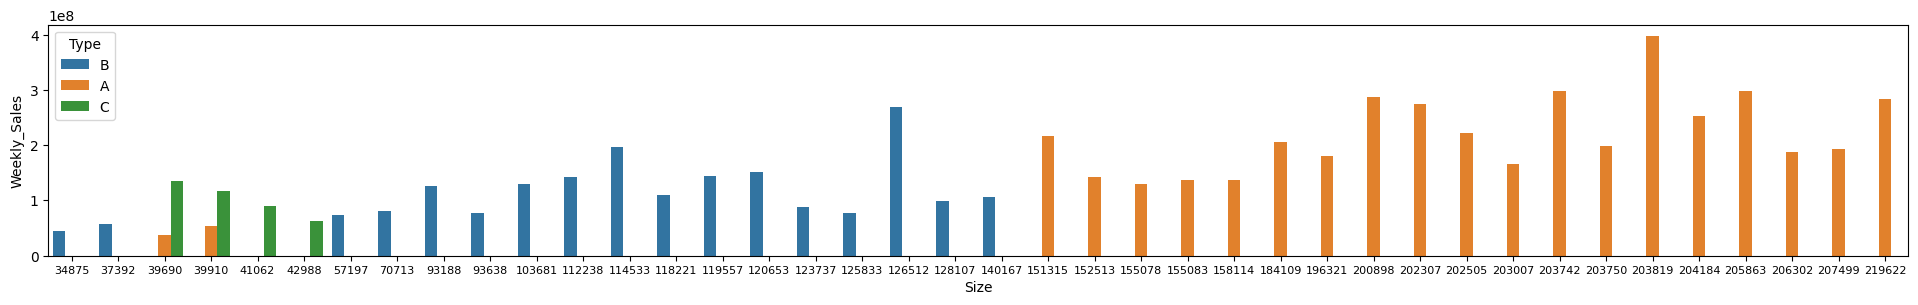

In [ ]:
sizes= df.groupby(["Size","Type"])['Weekly_Sales'].sum().round(0).reset_index()
f,ax1 =plt.subplots(figsize=(24,3))
sns.barplot(x=sizes["Size"],y=sizes["Weekly_Sales"],hue=sizes["Type"])
plt.xticks( fontsize=8)
plt.show()

**insight**: Se recalca que Tipo A de tiendas tiene mayor tamaño.

---

##Analisis multivariado

###Análisis de Correlacion

*Se aplica correlacion spearman*

<ipython-input-48-79f48e2999a1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr("spearman"),


<Axes: >

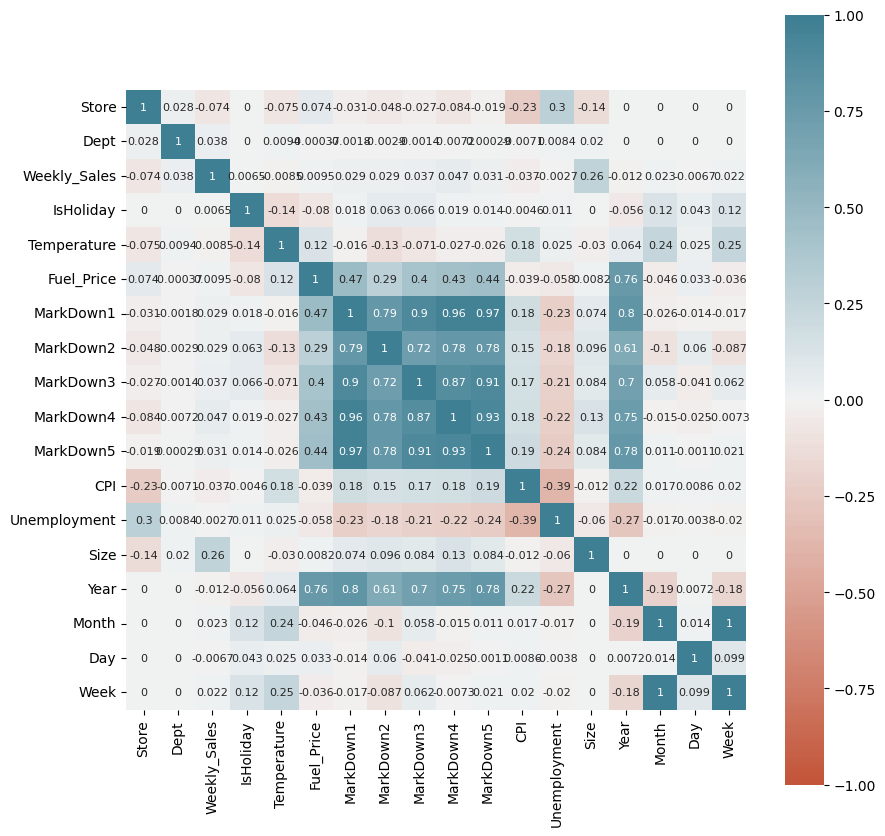

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(
    df.corr("spearman"),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
)

<ipython-input-49-db011936f197>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr('spearman')[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False)


<Axes: >

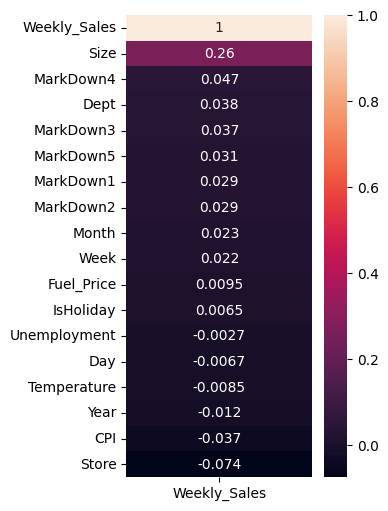

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
corr = df.corr('spearman')[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False)
sns.heatmap(corr, annot=True)

**insight**:

De la correlacion de Spearman se obtiene que:

*   El tamaño y el tipo estan altamente correlacionadas
*   El año con los Markdown 1-5, CPI y Fuel_price estan relacionados, ver graficos anteriores para entender

De la correlacion de Spearman con la variable objetivo de ventas semanales:

1.   Solo el tamaño de la tienda destaca.




---

In [ ]:
def spearman(data):
  stat, p = spearmanr(df['Weekly_Sales'], df[data])
  print("Analisis de: "+data)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('Probably independent')
    print("")
  else:
    print('Probably dependent')
    print("")

In [ ]:
spearman('Dept')
spearman('Type')
spearman('Size')
spearman('Temperature')
spearman('CPI')
spearman('Fuel_Price')
spearman('MarkDown1')
spearman('MarkDown2')
spearman('MarkDown3')
spearman('MarkDown4')
spearman('MarkDown5')
spearman('Store')
spearman('Unemployment')
spearman('IsHoliday')

Analisis de: Dept
stat=0.038, p=0.000
Probably dependent

Analisis de: Type
stat=-0.201, p=0.000
Probably dependent

Analisis de: Size
stat=0.262, p=0.000
Probably dependent

Analisis de: Temperature
stat=-0.008, p=0.000
Probably dependent

Analisis de: CPI
stat=-0.037, p=0.000
Probably dependent

Analisis de: Fuel_Price
stat=0.009, p=0.000
Probably dependent

Analisis de: MarkDown1
stat=0.029, p=0.000
Probably dependent

Analisis de: MarkDown2
stat=0.029, p=0.000
Probably dependent

Analisis de: MarkDown3
stat=0.037, p=0.000
Probably dependent

Analisis de: MarkDown4
stat=0.047, p=0.000
Probably dependent

Analisis de: MarkDown5
stat=0.031, p=0.000
Probably dependent

Analisis de: Store
stat=-0.074, p=0.000
Probably dependent

Analisis de: Unemployment
stat=-0.003, p=0.095
Probably independent

Analisis de: IsHoliday
stat=0.007, p=0.000
Probably dependent



#Análisis de valores atípicos

##Aplicando boxplots


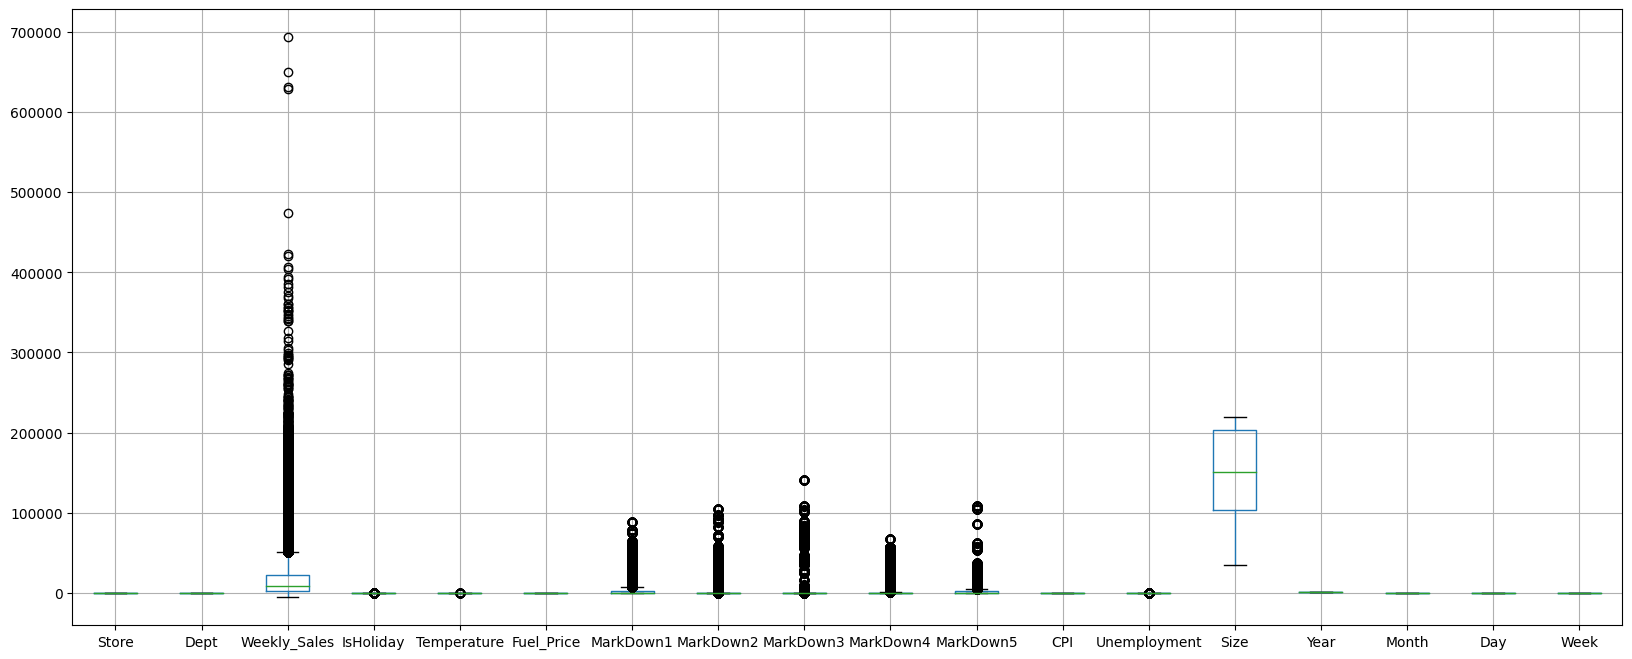

In [ ]:
def boxplot_data(dataframe):
  plt.figure(figsize = (20,8))
  dataframe.boxplot()
  plt.show()

boxplot_data(df)

**insight**: Solo "Weekly_sales" presenta valoes a atipicos


---



#Resumen de Conclusiones

In [ ]:
features = [feature for feature in df.columns if feature not in ('Day','Month','Year','Week')]
df=df[features]
df.to_csv('df.csv', index = False)

A partir del EDA realizado se obtiene que:

* La fecha empieza el **2010/02/05 y termina el 2012/10/26**  con saltos de tiempo de 1 semana a otra, siendo cada dia viernes de cada mes, con **143** semanas en total
* El departamento no 15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89 no existe para ninguna tienda.
* Se comprueba no todas las semanas total estan presenten en cada Store y departamentos donde debe haber por serie 143 registros.
* Los datos no sigen una distribucion normal
* Hay peak de ventas en fechas de fin de año, durant el resto del año se mantiene  estables las ventas, respecto a cada año.
* Medriante analisis descriptivo se tiene que:El tamaño de la tienda indica una tendencia de mas ventas, donde hay mas ventas por tipo de tienda A al estar mas presente en la base de datos.
* Mediante analisis de correlacion no se encontro ninguna relacion.
* Solo hay valores atipicos en la varibable de Ventas semanales.

